# Ocean biogeochemistry and trace metal oceanography field history

Based on searches within Web of Science.

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from collections import Counter

%matplotlib inline

Parameters / folder names

In [2]:
folder_base   = '/ocean/brogalla/GEOTRACES/data/web-of-science/'

Load data

In [3]:
GEOTRACES     = pd.read_csv(f'{folder_base}GEOTRACES.csv', header=10)
GEOSECS       = pd.read_csv(f'{folder_base}GEOSECS.csv', header=10)
JGOFS         = pd.read_csv(f'{folder_base}joint-global-ocean-flux-study.csv', header=10)
WOCE          = pd.read_csv(f'{folder_base}world-ocean-circulation-experiment.csv', header=10)
biochem       = pd.read_csv(f'{folder_base}ocean_biogeochemistry.csv', header=10)
biochem_model = pd.read_csv(f'{folder_base}ocean_biogeochemistry_modelling.csv', header=10)

GEOTRACES_publication_years = GEOTRACES['Publication Year'].values
GEOSECS_publication_years   = GEOSECS['Publication Year'].values
JGOFS_publication_years     = JGOFS['Publication Year'].values
WOCE_publication_years      = WOCE['Publication Year'].values
biochem_publication_years   = biochem['Publication Year'].values
biochem_model_publication_years = biochem_model['Publication Year'].values

In [184]:
cGEOTRACES     = pd.DataFrame.from_dict(Counter(GEOTRACES_publication_years), orient='index').reset_index()
cGEOSECS       = pd.DataFrame.from_dict(Counter(GEOSECS_publication_years), orient='index').reset_index()
cJGOFS         = pd.DataFrame.from_dict(Counter(JGOFS_publication_years), orient='index').reset_index()
cWOCE          = pd.DataFrame.from_dict(Counter(WOCE_publication_years), orient='index').reset_index()
cbiochem       = pd.DataFrame.from_dict(Counter(biochem_publication_years), orient='index').reset_index()
cbiochem_model = pd.DataFrame.from_dict(Counter(biochem_model_publication_years), orient='index').reset_index()

cGEOTRACES     = cGEOTRACES.rename(columns={'index':'year', 0:'count'})
cGEOSECS       = cGEOSECS.rename(columns={'index':'year', 0:'count'})
cJGOFS         = cJGOFS.rename(columns={'index':'year', 0:'count'})
cWOCE          = cWOCE.rename(columns={'index':'year', 0:'count'})
cbiochem       = cbiochem.rename(columns={'index':'year', 0:'count'})
cbiochem_model = cbiochem_model.rename(columns={'index':'year', 0:'count'})

Make figure

In [185]:
all_publication_years = np.concatenate((GEOTRACES_publication_years, GEOSECS_publication_years, \
                                      JGOFS_publication_years, WOCE_publication_years))

In [188]:
print(len(all_publication_years))
print(len(GEOTRACES_publication_years))
print(len(GEOSECS_publication_years))
print(len(JGOFS_publication_years))
print(len(WOCE_publication_years))

1690
561
151
210
768


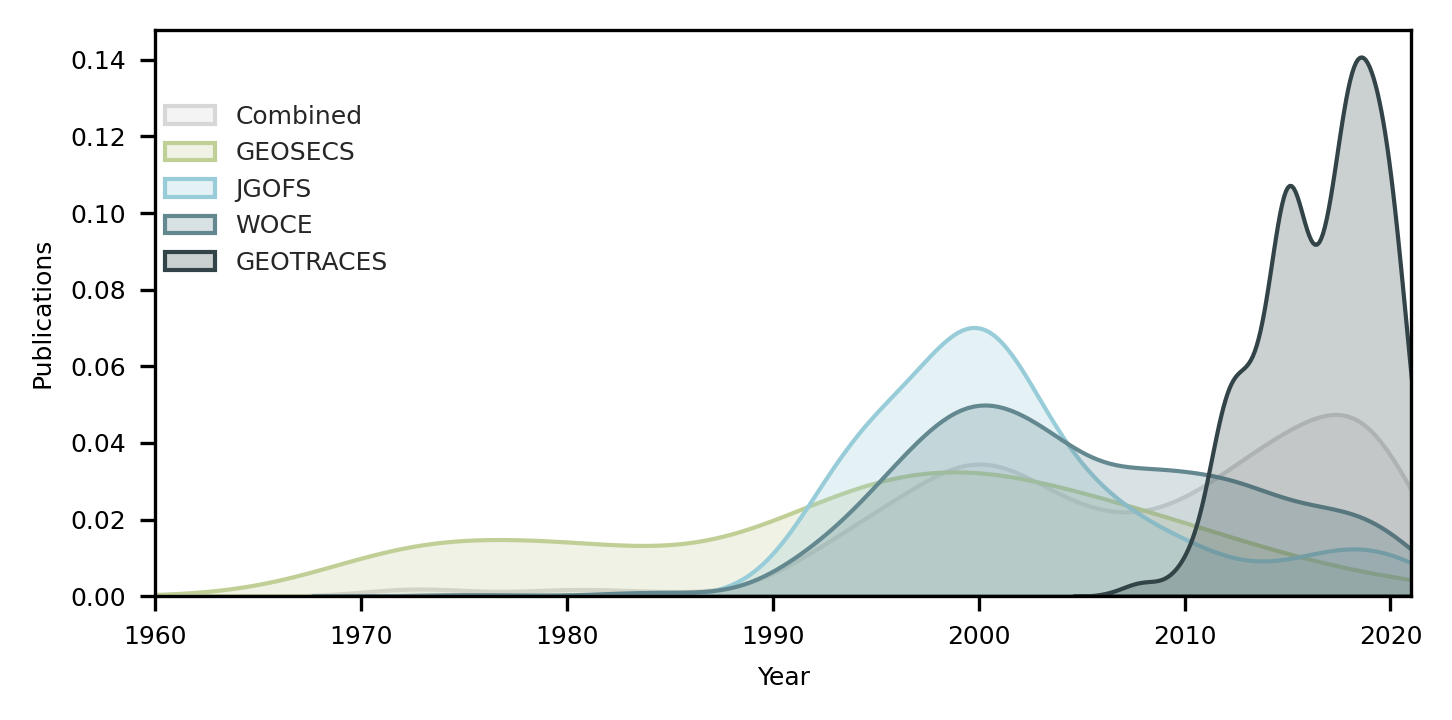

In [163]:
fig, ax = plt.subplots(1,1, figsize=(5.4,2.5), dpi=300)
st = sns.axes_style("whitegrid")
# sns.set_palette("viridis_r", n_colors=4)
color_list = ['#d7d7d7', '#c0cf95','#97ccd8','#648890','#324448']
sns.set_palette(sns.color_palette(color_list))

with st:
#     sns.kdeplot(biochem_publication_years      , label='Ocean biogeochemistry'  , fill=True, ax=ax)   
    sns.kdeplot(all_publication_years      , label='Combined'  , fill=True, ax=ax)   
#     sns.kdeplot(biochem_model_publication_years, label='Ocean biogeochemistry modelling', fill=True, ax=ax)   
    sns.kdeplot(GEOSECS_publication_years  , label='GEOSECS'  , fill=True,  ax=ax)        
    sns.kdeplot(JGOFS_publication_years    , label='JGOFS', fill=True,  ax=ax)       
    sns.kdeplot(WOCE_publication_years     , label='WOCE', fill=True,  ax=ax)
    sns.kdeplot(GEOTRACES_publication_years, label='GEOTRACES', fill=True,  ax=ax)
       
        
#     plt.yticks(fig.get_yticks(), fig.get_yticks() * 100)
    ax.set_xlabel('Year', fontsize=6)
    ax.set_ylabel('Publications', fontsize=6)
    ax.tick_params(axis='both', labelsize=6)
    ax.set(xlim=(1960, 2021))#, ylim=(0, 20))
    ax.legend(loc=(0,0.55), frameon=False, fontsize=6)
#     ax.axis('off')

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/trace-metal-history.png', bbox_inches='tight')

In [258]:
np.sum(biochem_publication_years==2020)

278

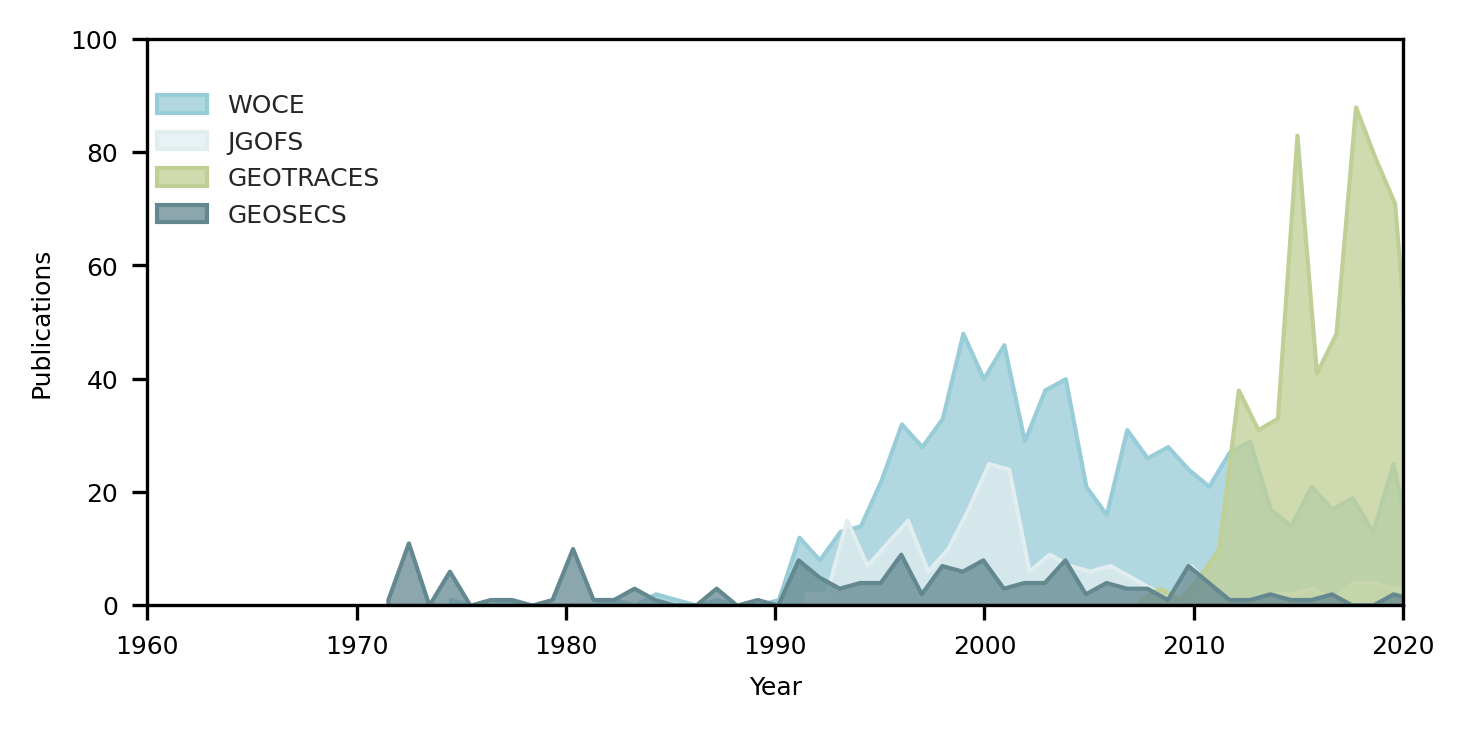

In [319]:
fig, ax = plt.subplots(1,1, figsize=(5.4,2.5), dpi=300)
st  = sns.axes_style("whitegrid")
# sns.set_palette("viridis_r", n_colors=4)
color_list = ['#97ccd8','#648890','#e1edef','#c0cf95']
# color_list = ['#97ccd8','#e1edef','#c0cf95','#648890']
sns.set_palette(sns.color_palette(color_list))

with st:    
    sns.histplot(WOCE_publication_years     , label='WOCE', ax=ax, fill=True, color=color_list[0], stat='count', \
                 bins=np.unique(WOCE_publication_years)[-1]+1-np.unique(WOCE_publication_years)[0], element="poly")     
    sns.histplot(JGOFS_publication_years    , label='JGOFS', ax=ax, fill=True, color=color_list[2], stat='count', \
                 bins=np.unique(JGOFS_publication_years)[-1]+1-np.unique(JGOFS_publication_years)[0], element="poly") 
    sns.histplot(GEOTRACES_publication_years, label='GEOTRACES', ax=ax, fill=True, color=color_list[3], stat='count', \
                 bins=np.unique(GEOTRACES_publication_years)[-1]+1-np.unique(GEOTRACES_publication_years)[0], element="poly")
    sns.histplot(GEOSECS_publication_years  , label='GEOSECS',  ax=ax, fill=True, color=color_list[1], stat='count', \
                 bins=np.unique(GEOSECS_publication_years)[-1]+1-np.unique(GEOSECS_publication_years)[0], element="poly")
    
    ax.set_xlabel('Year', fontsize=6)
    ax.set_ylabel('Publications', fontsize=6)
    ax.tick_params(axis='both', labelsize=6)
    ax.set(xlim=(1960, 2020), ylim=(0, 100))
    ax.legend(loc=(0,0.65), frameon=False, fontsize=6)
#     ax.axis('off')

fig.savefig('/ocean/brogalla/GEOTRACES/figures/trace-metal-history.png', bbox_inches='tight')

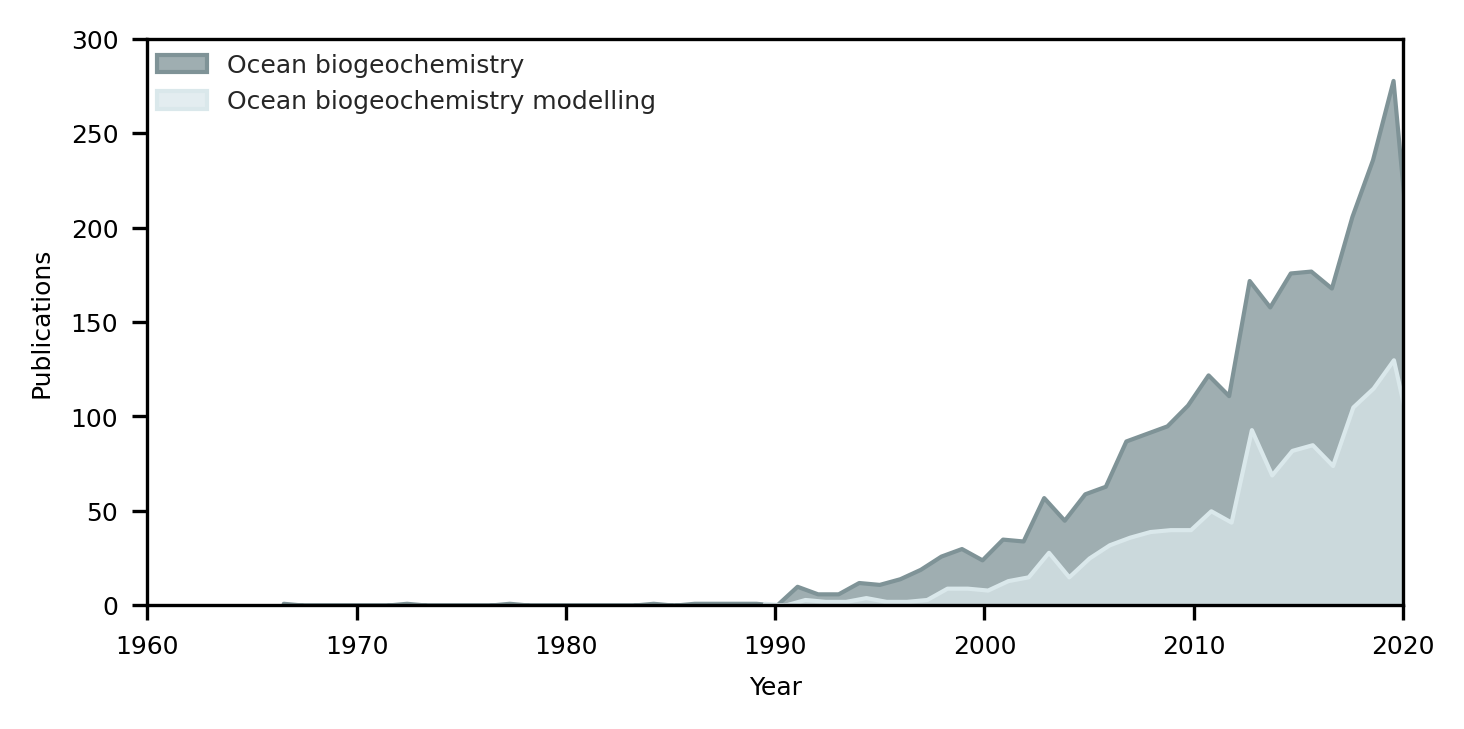

In [298]:
fig, ax = plt.subplots(1,1, figsize=(5.4,2.5), dpi=300)
st  = sns.axes_style("whitegrid")
# sns.set_palette("viridis_r", n_colors=4)
color_list = ['#7f9397','#dae8eb']
sns.set_palette(sns.color_palette(color_list))

with st:
    sns.histplot(biochem_publication_years      , label='Ocean biogeochemistry', ax=ax, fill=True, stat='count',\
                 bins=np.unique(biochem_publication_years)[-1]+1-np.unique(biochem_publication_years)[0], \
                 color=color_list[0], element="poly")
    sns.histplot(biochem_model_publication_years      , label='Ocean biogeochemistry modelling', ax=ax, fill=True, stat='count',\
                 bins=np.unique(biochem_model_publication_years)[-1]+1-np.unique(biochem_model_publication_years)[0], \
                 color=color_list[1], element="poly")
    
    ax.set_xlabel('Year', fontsize=6)
    ax.set_ylabel('Publications', fontsize=6)
    ax.tick_params(axis='both', labelsize=6)
    ax.set(xlim=(1960, 2020), ylim=(0, 300))
    ax.legend(loc=(0,0.85), frameon=False, fontsize=6)
#     ax.axis('off')

fig.savefig('/ocean/brogalla/GEOTRACES/figures/biochem-history.png', bbox_inches='tight')